## <img src="https://cdn.dal.ca/about-dal/history-tradition/logo-seal/_jcr_content/contentPar/staticimage.adaptive.full.high.png/1654529048363.png" alt="Dalogo" width="200"/>

# CSCI 4144 -  Data Mining and Data Warehousing
# Assignment 1 - Basic Techniques

**Due:** 2 February, 19h AT

**Your name:** \[Arash Tashakori\]  

The main purpose of this assignment is to get familiar with processes of constructing and using a data warehouse. There are two sections: the first focuses on simple data loading and cleaning with simple data, and the second focuses on more complex data. In both cases, we will use publicly available datasets focused in the healthcare domain.

In [21]:
# import any libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from fitter import Fitter, get_common_distributions


# your code should run in Python3.9

## Section 1 - Data cleaning and ETL

A [Notifiable disease](https://en.wikipedia.org/wiki/Notifiable_disease#Canada) is any disease that, by law, must be reported to government authorities. Aggregating data on these diseases allows the authorities to monitor their development, and provides early warning of possible outbreaks. The [Canadian Notifiable Disease Surveillance System](https://diseases.canada.ca/notifiable/) is a searchable database tool provided by the Public Health Agency of Canada. 

In this Section, we will practice cleaning some small, simple datasets.

### Dataset

The data for this section come from [Nova Scotia's Open Data Portal](https://data.novascotia.ca/) under the [Nova Scotia Open Government Licence](http://novascotia.ca/opendata/licence.asp). Specifically:

1. [Notifiable Diseases Counts and Rates By Zone 2014-2017](https://data.novascotia.ca/Health-and-Wellness/Notifiable-Diseases-Counts-and-Rates-By-Zone-2014-/36ek-n7n8), and
2. [Notifiable Diseases Counts and Rates By Sex 2014-2017](https://data.novascotia.ca/Health-and-Wellness/Notifiable-Diseases-Counts-and-Rates-By-Sex-2014-2/hgpa-vixp)

The two files are in the [CSV](https://www.w3schools.com/python/pandas/pandas_csv.asp) file format, with a single header row and the following fields (Zone and Sex only appear in their respective file):

| Field                       | Type      | Description |
|-----------------------------|-----------|-------------|
| Zone                        | Text      | One of four non-overlapping regions, or the aggregate 'Nova Scotia'      |
| Sex                         | Text      | Traditional binary labels, or the aggregate 'All'       |
| Year                        | Int       | The year in the Common Era |
| Disease                     | Text      | The name of the disease. Additional information on the diseases can be found [here](https://novascotia.ca/dhw/cdpc/cdc/). |
| Number of Cases             | Int       | The number of cases in the indicated region, for the indicated year |
| Rate per 100,000 population | Float     | The rate per 100,000 population in the indicated region, for the indicated year |


Public government data are less likely to contain errors that require cleaning or correction, so we have artificially corrupted the data for this assignment using a Python script. Specifically, we have made the following corruptions:

1. **Removal**. We have randomly removed data in individual cells. Fields may be empty, have some indicative label such as 'Null', or some other corruption indicating deletion. To mimic real-world scenarios, we cannot tell you what all of these corruptions may be.
2. **Range errors**. We have given some numeric data impossibly small values.
3. **Spelling**. We have introduced spelling mistakes using the [corrupted-text](https://pypi.org/project/corrupted-text/) library to text fields.
4. **Duplicates**. We have randomly repeated some rows
5. **Shuffle**. We have randomly shuffled rows subsequent to the above corruptions.

### Tasks

Our tasks in this section are to clean the data, perform simple 'sanity checks', and display some simple visualizations. This is essentially a simplified view into an ETL process. You can use the clean data provided directly by the Nova Scotia government at the links above to validate your work, but your code must work assuming you don't have acss to the clean gold standard versions. Also note that we are fortunate that these data have, essentially, error-correcting codes built in, since 'All' data should be the sum of Male and Female data, and 'Nova Scotia' data should be the sum of all the individual regions.

Complete each of the code cells below according to the instructions in the comments.



In [22]:
# 1. load the corrupted data in a Pandas DataFrame. 
urlSex  = 'https://dalu-my.sharepoint.com/:x:/g/personal/fr591304_dal_ca/EUnhH83PuIxLqeuqgLOWzvEBYIwKeceA9ybo6gUEAf_Scg?e=xmMggl'
urlZone = 'https://dalu-my.sharepoint.com/:x:/g/personal/fr591304_dal_ca/EQKD8ypIrSBBpqMeW0TuT6QBlcxtijJnCvhVOf7EEBKXFg?e=vIXqr6'

dataBySex = pd.read_csv("Notifiable_Diseases_Counts_and_Rates_By_Sex_2014-2017.corrupt.csv", index_col = 0)
dataByZone = pd.read_csv("Notifiable_Diseases_Counts_and_Rates_By_Zone_2014-2017.corrupt.csv", index_col = 0)

print (dataBySex)
print (dataByZone)


        Sex    Year                                       Disease  \
0    Female  2014.0                        Listeriosis - Invasive   
1       All  2017.0                                 Salmonellosis   
2      Male  2014.0                                       Typhoid   
3      Male  2015.0                                  Tuberculosis   
4       All  2014.0                                       Rubella   
..      ...     ...                                           ...   
544  Female  2014.0                             Cryptosporidiosis   
545     All  2015.0  Group B Streptococcal Disease of the Newborn   
546    Male  2014.0                                   Hepatitis C   
547    Male  2016.0                       Lyme Disease - Probable   
548  Female  2016.0                           Hepatitis B - Acute   

     Number of Cases  Rate per 100,000 population  
0                3.0                          0.6  
1              171.0                         17.9  
2              

In [23]:
# 2. sort both DataFrames by Year, then by Disease, then by either Zone or Sex. 
#    I.e., all data for 2014 comes before all data from 2015; 
#          within 2014, all data for 'Acquired Immune Deficiency Syndrome' comes before all data for 'Hepatitis B - Acute', 
#          and so on 


srtDataBySex = dataBySex.sort_values(by = ["Year", "Disease", "Sex"])
srtDataByZone = dataByZone.sort_values(by = ["Year", "Disease", "Zone"])

srtDataByZone = srtDataByZone.reset_index(drop="True")
srtDataBySex = srtDataBySex.reset_index(drop="True")



print("Sorted List of the Notifiable Diseases by Sex:")
print(srtDataBySex)
print("Sorted List of the Notifiable Diseases by Zone:")
print(srtDataByZone)


Sorted List of the Notifiable Diseases by Sex:
        Sex    Year                              Disease  Number of Cases  \
0       All  2014.0  Acquired Immune Deficiency Syndrome              2.0   
1    Female  2014.0  Acquired Immune Deficiency Syndrome              0.0   
2      Male  2014.0  Acquired Immune Deficiency Syndrome              2.0   
3       All  2014.0              Acute Flaccid Paralysis              1.0   
4    Female  2014.0              Acute Flaccid Paralysis              1.0   
..      ...     ...                                  ...              ...   
544    Male  2017.0                      West Nile Virus              0.0   
545    Male  2017.0                                  NaN              0.0   
546    Male     NaN                          Hepatitis A              1.0   
547    Male     NaN         Human Immunodeficiency Virus             15.0   
548     All     NaN                              Q-Fever              0.0   

     Rate per 100,000 popula

In [24]:
# 3. identify duplicate entries

# TODO: for each DataFrame, print a list of row indices for all duplicates except the first. 
#        E.g., if row 52 is a duplicate of row 51, and row 201 is a duplicate of row 200, 
#              print [52,201]
duplicatesBySex = []
for i in range (len(srtDataBySex) - 1):
    if ((srtDataBySex.iloc[i]["Year"] == srtDataBySex.iloc[i + 1]["Year"]) and 
        (srtDataBySex.iloc[i]["Disease"] == srtDataBySex.iloc[i + 1]["Disease"]) and
        (srtDataBySex.iloc[i]["Sex"]) == srtDataBySex.iloc[i + 1]["Sex"]):

        duplicatesBySex.append(i + 1)

duplicatesByZone = []
for i in range (len(srtDataByZone) - 1):
    if ((srtDataByZone.iloc[i]["Year"] == srtDataByZone.iloc[i + 1]["Year"]) and 
        (srtDataByZone.iloc[i]["Disease"] == srtDataByZone.iloc[i + 1]["Disease"]) and
        (srtDataByZone.iloc[i]["Zone"]) == srtDataByZone.iloc[i + 1]["Zone"]):

        duplicatesByZone.append(i + 1)

print("The List of the duplicated row numbers in the Notifiable Diseases Stats by Sex:")
print(str(duplicatesBySex))

print("The List of the duplicated row numbers in the Notifiable Diseases Stats by Zone:")
print(str(duplicatesByZone))

# TODO: remove the duplicate rows from the two DataFrames
for i in duplicatesBySex[::-1]:
    srtDataBySex = srtDataBySex.drop(i).reset_index(drop=True)
    

for i in duplicatesByZone[::-1]:
    srtDataByZone = srtDataByZone.drop(i).reset_index(drop=True)



The List of the duplicated row numbers in the Notifiable Diseases Stats by Sex:
[134, 312, 349]
The List of the duplicated row numbers in the Notifiable Diseases Stats by Zone:
[4, 234, 303, 597, 877]


In [25]:
# 4. identify cells with missing data

# TODO YOUR CODE GOES HERE
isMissingBySex = srtDataBySex.isnull()
isMissingByZone = srtDataByZone.isnull()

missingListBySex = []
missingListByZone = []

# TODO: print a list of indices for the corrupted cells. 
#        E.g., if cells [9, 3] and [20, 1] are missing or have null-like labels, print [[9,3],[20,1]]

for i in range(srtDataBySex.shape[0]):
    for j in range(srtDataBySex.shape[1]):
        if isMissingBySex.iloc[i, j]:
            missingListBySex.append([i, j])

for i in range(srtDataByZone.shape[0]):
    for j in range(srtDataByZone.shape[1]):
        if isMissingByZone.iloc[i, j]:
            missingListByZone.append([i, j])

print("The List of the Missing Indices in the Notifiable Diseases Stats by Sex:")
print(str(missingListBySex))

print("The List of the Missing Indices in the Notifiable Diseases Stats by Zone:")
print(str(missingListByZone))


# TODO: replace these elements with np.nan

for [i,j] in missingListBySex:
        srtDataBySex.iloc[i, j] = np.nan

for [i,j] in missingListByZone:
        srtDataByZone.iloc[i, j] = np.nan


The List of the Missing Indices in the Notifiable Diseases Stats by Sex:
[[69, 4], [92, 4], [121, 4], [122, 4], [154, 2], [159, 4], [175, 0], [180, 4], [184, 0], [206, 4], [236, 3], [241, 4], [263, 4], [296, 4], [334, 0], [360, 0], [415, 2], [416, 2], [417, 2], [418, 4], [449, 0], [486, 3], [513, 3], [542, 2], [543, 1], [544, 1], [545, 1]]
The List of the Missing Indices in the Notifiable Diseases Stats by Zone:
[[9, 0], [34, 4], [52, 0], [57, 0], [104, 4], [141, 4], [187, 4], [213, 0], [229, 3], [243, 0], [267, 3], [276, 4], [322, 0], [371, 0], [409, 3], [459, 4], [469, 2], [470, 2], [504, 0], [524, 4], [531, 3], [568, 0], [604, 4], [672, 3], [685, 2], [686, 2], [687, 2], [709, 3], [808, 0], [893, 2], [894, 2], [895, 1], [896, 1], [897, 1], [898, 1], [899, 1], [900, 1], [901, 1], [902, 1], [903, 1], [904, 1], [905, 1], [906, 1], [907, 1], [908, 1], [909, 1]]


In [26]:
# 5. identify cells with out-of-bounds errors
outOfBoundBySex = []
outOfBoundByZone = []


# TODO YOUR CODE GOES HERE
# TODO: print a list of indices for the corrupted cells. 
#        E.g., if cells [9, 3] and [20, 1] have out-of-bounds data, print [[9,3],[20,1]]
for i in range(len(srtDataBySex)):
    if srtDataBySex.loc[i, "Sex"] not in ["Male", "Female", "All"]:
        outOfBoundBySex.append ([i, 0])
    if srtDataBySex.loc[i, "Year"] < 2014 or srtDataBySex.loc[i, "Year"] > 2017:
        outOfBoundBySex.append ([i, 1])
    if srtDataBySex.loc[i, "Number of Cases"] < 0:
        outOfBoundBySex.append ([i, 3])
    if srtDataBySex.loc[i, "Rate per 100,000 population"] < 0:
        outOfBoundBySex.append ([i, 4])
    
    
    
for i in range(len(srtDataByZone)):
    if srtDataByZone.loc[i, "Zone"] not in ["Central", "Eastern", "Northern", "Western", "Nova Scotia"]:
        outOfBoundByZone.append ([i, 0])
    if srtDataByZone.loc[i, "Year"] < 2014 or srtDataByZone.loc[i, "Year"] > 2017:
        outOfBoundByZone.append ([i, 1])
    if srtDataByZone.loc[i, "Number of Cases"] < 0:
        outOfBoundByZone.append ([i, 3])
    if srtDataByZone.loc[i, "Rate per 100,000 population"] < 0:
        outOfBoundByZone.append ([i, 4])

print("The List of the out-of-bound Indices in the Notifiable Diseases Stats by Sex:")
print(str(outOfBoundBySex))

print("The List of the out-of-bound Indices in the Notifiable Diseases Stats by Zone:")
print(str(outOfBoundByZone))


# TODO: replace these elements with np.nan

for [i,j] in outOfBoundBySex:
    srtDataBySex.iloc[i, j] = np.nan

for [i,j] in outOfBoundByZone:
    srtDataByZone.iloc[i, j] = np.nan


The List of the out-of-bound Indices in the Notifiable Diseases Stats by Sex:
[[81, 4], [104, 3], [175, 0], [184, 0], [215, 0], [334, 0], [360, 0], [449, 0], [485, 0], [493, 4]]
The List of the out-of-bound Indices in the Notifiable Diseases Stats by Zone:
[[9, 0], [52, 0], [57, 0], [126, 0], [136, 0], [213, 0], [237, 4], [243, 0], [322, 0], [356, 0], [371, 0], [387, 4], [504, 0], [568, 0], [668, 3], [710, 0], [808, 0]]


In [27]:
# 6. perform additional internal 'sanity check' within each data set
#    For each year, the total reported number of each disease (i.e., in the 'All' or 'Nova Scotia' rows)
#    should be the sum of the component parts.

# TODO: make a list of all unique disease names
diseaseNames = []

for i in range (srtDataBySex.shape[0]):
    if srtDataBySex.loc[i, "Disease"] is not np.nan:
        diseaseNames.append(srtDataBySex.loc[i, "Disease"])

for i in range (srtDataByZone.shape[0]):
    if srtDataByZone.loc[i, "Disease"] is not np.nan:
        diseaseNames.append(srtDataByZone.loc[i, "Disease"])

# Getting the unique names for the diseases by turning it into a set and converting it back to a list
diseaseNames = set (diseaseNames)
diseaseNames = list (diseaseNames)

# TODO: your code goes here

for year in range(2014,2018):
        for diseaseName in diseaseNames:
            
            # TODO: if the reported total number of cases is not the same as the sums of the component parts 
            #       (e.g., if the reported 'All' is not the sum of the male and female cases), then
            componentPartsBySex = srtDataBySex [(srtDataBySex["Year"] == year) & (srtDataBySex["Disease"] == diseaseName) 
                                                & (srtDataBySex["Sex"] != "All")]
            sumCompPartsBySex = componentPartsBySex["Number of Cases"].sum()

            totalReportedBySex = srtDataBySex [(srtDataBySex["Year"] == year) & (srtDataBySex["Disease"] == diseaseName) 
                                                & (srtDataBySex["Sex"] == "All")]
            totalSumReportedBySex = totalReportedBySex["Number of Cases"].sum()

            if sumCompPartsBySex != totalSumReportedBySex:
                print( str(year) + ' ' + str(diseaseName) + ' does not sum correctly for Sex' +'!')

for year in range(2014,2018):
        for diseaseName in diseaseNames:
            
           
            componentPartsByZone = srtDataByZone [(srtDataByZone["Year"] == year) & (srtDataByZone["Disease"] == diseaseName) 
                                                & (srtDataByZone["Zone"] != "Nova Scotia")]
            sumCompPartsByZone = componentPartsByZone["Number of Cases"].sum()

            totalReportedByZone = srtDataByZone [(srtDataByZone["Year"] == year) & (srtDataByZone["Disease"] == diseaseName) 
                                                & (srtDataByZone["Zone"] == "Nova Scotia")]
            totalSumReportedByZone = totalReportedByZone["Number of Cases"].sum()

            if sumCompPartsByZone != totalSumReportedByZone:
                print( str(year) + ' ' + str(diseaseName) + ' does not sum correctly for Zone' +'!')
        

2014 Chlamydia does not sum correctly for Sex!
2014 Pertussis does not sum correctly for Sex!
2015 Meningococcal Disease Invasive does not sum correctly for Sex!
2015 Chlamydia does not sum correctly for Sex!
2015 Human Immunodeficiency Virus does not sum correctly for Sex!
2016 Group A Streptococcal Disease Invasive -> non-Severe does not sum correctly for Sex!
2016 Giardiasis does not sum correctly for Sex!
2016 Chlamydia does not sum correctly for Sex!
2016 Human Immunodeficiency Virus does not sum correctly for Sex!
2016 Grodp A Styeptococcal Diseake Invaoive -x nou - Sevede does not sum correctly for Sex!
2017 Salmonellosis does not sum correctly for Sex!
2017 Chlamydia does not sum correctly for Sex!
2017 Lyme Disease - Probable does not sum correctly for Sex!
2017 Group B Streptococcal Disease of the Newborn does not sum correctly for Sex!
2017 Hepatitis A does not sum correctly for Sex!
2014 Hepatitis B - Chronic does not sum correctly for Zone!
2014 Typhoid does not sum correc

In [28]:
# 7. perform additional external 'sanity check' across both data sets
#    For each year, the total number of each disease should be the same in each dataset 
#    (i.e., the 'All' Sex rows should match the 'Nova Scotia' Zone rows)

# TODO: make a list of all unique disease names
#THIS SECTION IS THE REPETITION OF 
diseaseNames = []
for i in range (srtDataBySex.shape[0]):
    if srtDataBySex.loc[i, "Disease"] is not np.nan:
        diseaseNames.append(srtDataBySex.loc[i, "Disease"])

for i in range (srtDataByZone.shape[0]):
    if srtDataByZone.loc[i, "Disease"] is not np.nan:
        diseaseNames.append(srtDataByZone.loc[i, "Disease"])

# Getting the unique names for the diseases by turning it into a set and converting it back to a list
diseaseNames = set (diseaseNames)
diseaseNames = list (diseaseNames)

# TODO: your code goes here

for year in range(2014,2018):
    for diseaseName in diseaseNames:
        
        # TODO: if the reported total number of cases is not the same across datasets 
        #       (i.e., if the reported 'All' in Sex is not the same as the reported 'Nova Scotia' in Zone), then
        allSexReported = srtDataBySex [(srtDataBySex["Year"] == year) & (srtDataBySex["Disease"] == diseaseName) 
                                                & (srtDataBySex["Sex"] == "All")]
        totalAllSexReported = allSexReported["Number of Cases"].sum()

        allZoneReported = srtDataByZone [(srtDataByZone["Year"] == year) & (srtDataByZone["Disease"] == diseaseName) 
                                                & (srtDataByZone["Zone"] == "Nova Scotia")]
        totalAllZoneReported = allZoneReported["Number of Cases"].sum()

        if totalAllSexReported != totalAllZoneReported:
            print( str(year) + " " + str(diseaseName) + ' does not match across datasets!')


2014 Vancomycin Resistant Enterococcus does not match across datasets!
2014 Vancomycin resistant Enterococcus (VRE) does not match across datasets!
2014 Verotoxigenic E.coli does not match across datasets!
2014 Mumps does not match across datasets!
2014 Pertussis does not match across datasets!
2014 Methicillin Resistant Staphylococcus Aureus does not match across datasets!
2014 Verotoxigenic E. coli does not match across datasets!
2014 Methicillin Resistant Staphylococcus Aureus (MRSA) does not match across datasets!
2015 Vancomycin Resistant Enterococcus does not match across datasets!
2015 Vancomycin resistant Enterococcus (VRE) does not match across datasets!
2015 Verotoxigenic E.coli does not match across datasets!
2015 Methicillin Resistant Staphylococcus Aureus does not match across datasets!
2015 Verotoxigenic E. coli does not match across datasets!
2015 Methicillin Resistant Staphylococcus Aureus (MRSA) does not match across datasets!
2016 Vancomycin Resistant Enterococcus doe

     Sex    Year Disease  Number of Cases  Rate per 100,000 population
101  All  2014.0   Mumps              1.0                          0.1
241  All  2015.0   Mumps              6.0                          NaN
370  All  2016.0   Mumps              1.0                          0.1
503  All  2017.0   Mumps             21.0                          2.2


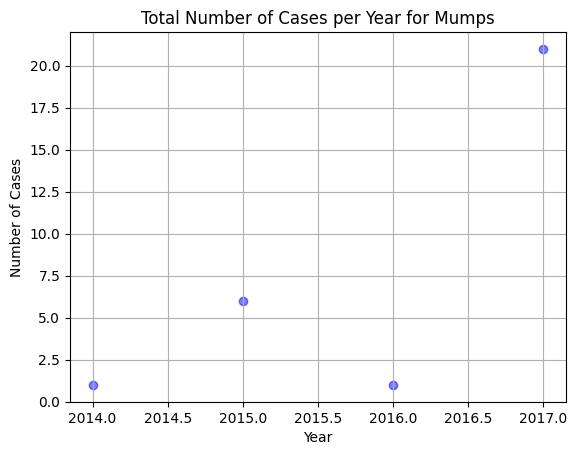

In [29]:
# 8. plot the total number of cases for each year, for the disease indicated in 'diseaseName'
#    Use the matplotlib scatter function (https://matplotlib.org/stable/plot_types/basic/scatter_plot.html)

diseaseName = 'Mumps'

# TODO: your code goes here. Be sure to handle potential errors. 
#       Add appropriate axis labels and title.


diseaseStats = srtDataBySex [(srtDataBySex["Disease"] == diseaseName) & (srtDataBySex["Sex"] == "All")]


print(diseaseStats)




plt.scatter(diseaseStats["Year"], diseaseStats["Number of Cases"], color="blue", alpha=0.5)
plt.title("Total Number of Cases per Year for " + str(diseaseName))
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

## Section 2 - Data imputation, reduction, and basic analysis

The novel coronavirus disease 2019 ([COVID-19](https://www.canada.ca/en/public-health/services/diseases/coronavirus-disease-covid-19.html)) is a contagious disease caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in December 2019. The disease quickly spread worldwide, resulting in the COVID-19 pandemic. 

In this Section, we will use some simple data science techniques to 1) identify similarities between countries, 2) identify covariates that relate to 

### Dataset: Our World in Data COVID 

The data for this section come [Our World in Data](https://ourworldindata.org/coronavirus), i.e., from their GitHub [repository](https://github.com/owid/covid-19-data/tree/master/public/data). More specifically, the that team aggregated data from multiple sources such as [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19), various official national sources, the United Nations, the World Bank, Global Burden of Disease, and others. It is released under the [Creative Commons BY License](https://creativecommons.org/licenses/by/4.0/).

There are 67 features in the dataset, only some of which we will use. For information on these, consult https://github.com/owid/covid-19-data/tree/master/public/data.

### Tasks

Our task is to look for simple patterns in the COVID data. First, we will 'fill in the blanks' in the data through imputation, project the data down into fewer dimensions, perform some simple distribution fitting to the data, compute measures of entropy, and finally look for features that are highly related or informative.

Complete each of the code cells below according to the instructions in the comments.

In [30]:
from sklearn.impute import KNNImputer
# 1. Impute mising data
urlCOVID = 'https://dal.brightspace.com/d2l/le/dropbox/250788/174362/DownloadAttachment?fid=14594172'

text_fields = ['location','date']
numeric_fields = ['new_cases_per_million', 'new_deaths_per_million', 
                  'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred', 
                  'stringency_index', 'population_density', 'median_age', 
                  'gdp_per_capita','extreme_poverty','cardiovasc_death_rate',
                  'hospital_beds_per_thousand','life_expectancy','human_development_index',
                  'population']
columnsToUse = text_fields + numeric_fields


#Loading the data and taking only countries with population over 30M into the dataframe
covidData = pd.read_csv("owid-covid-data.csv", usecols=columnsToUse)
covidData = covidData[covidData["population"] >= 30000000]

#Separating the non-numeric columns to be able to do knn Imputation
textData = covidData[text_fields].copy()
numericData = covidData[numeric_fields].copy()

#Performing the imputation on the numeric subset
knnImputer = KNNImputer(n_neighbors=3)
imputedNumericData = knnImputer.fit_transform(numericData)

#Converting the imputed list back to the dataframe format
imputedNumericDF = pd.DataFrame(imputedNumericData, columns=numeric_fields, index=numericData.index)

#Attaching the numeric and non-numeric parts again
imputedCovidData = pd.concat([textData, imputedNumericDF], axis=1)


print(imputedCovidData)



           location        date  new_cases_per_million  \
0       Afghanistan  2020-02-24                  0.122   
1       Afghanistan  2020-02-25                  0.000   
2       Afghanistan  2020-02-26                  0.000   
3       Afghanistan  2020-02-27                  0.000   
4       Afghanistan  2020-02-28                  0.000   
...             ...         ...                    ...   
242345        Yemen  2022-12-17                  0.000   
242346        Yemen  2022-12-18                  0.000   
242347        Yemen  2022-12-19                  0.000   
242348        Yemen  2022-12-20                  0.000   
242349        Yemen  2022-12-21                  0.000   

        new_deaths_per_million  people_vaccinated_per_hundred  \
0                          0.0                      13.043333   
1                          0.0                      13.043333   
2                          0.0                      13.043333   
3                          0.0             

In [31]:
# 2. Extract the top 10 principal components
from sklearn.decomposition import PCA


#Standardizing the dataset
means = imputedNumericDF.mean()
stddevs = imputedNumericDF.std()
standardCovidData = (imputedNumericDF - means) / stddevs



pca = PCA (n_components=10)
prinComponents = pca.fit_transform (standardCovidData)

prinComponentDF = pd.DataFrame(data=prinComponents, columns=[f'Principal Component {i+1}' for i in range (10)],
                            index=imputedNumericDF.index)

#Attaching the text-based columns back to the Principal Component Dataframe
finalprinCompDF = pd.concat ([textData.reset_index(drop=True), prinComponentDF], axis=1)
print(finalprinCompDF)



           location        date  Principal Component 1  Principal Component 2  \
0       Afghanistan  2020-02-24              -3.341535              -1.129863   
1       Afghanistan  2020-02-25              -3.341594              -1.129854   
2       Afghanistan  2020-02-26              -3.341594              -1.129854   
3       Afghanistan  2020-02-27              -3.341594              -1.129854   
4       Afghanistan  2020-02-28              -3.341594              -1.129854   
...             ...         ...                    ...                    ...   
242345          NaN         NaN              -3.636156               0.443798   
242346          NaN         NaN              -3.636156               0.443798   
242347          NaN         NaN              -3.636156               0.443798   
242348          NaN         NaN              -3.636156               0.443798   
242349          NaN         NaN              -3.636156               0.443798   

        Principal Component

Fitting distributions for new_cases_per_million


2024-04-02 04:27:17.533 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=3e-06)
2024-04-02 04:27:17.545 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=3.2e-05)
2024-04-02 04:27:17.595 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=4.4e-05)
2024-04-02 04:27:17.619 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.8e-05)
2024-04-02 04:27:17.751 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=3.1e-05)
2024-04-02 04:27:18.377 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=4.5e-05)
2024-04-02 04:27:18.446 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=2.2e-05)
2024-04-02 04:27:18.468 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw dist

BEST FIT: expon
Parameters: (0.0, 113.76538939999382)


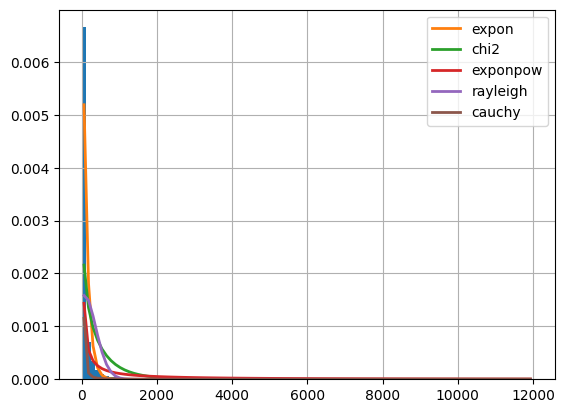

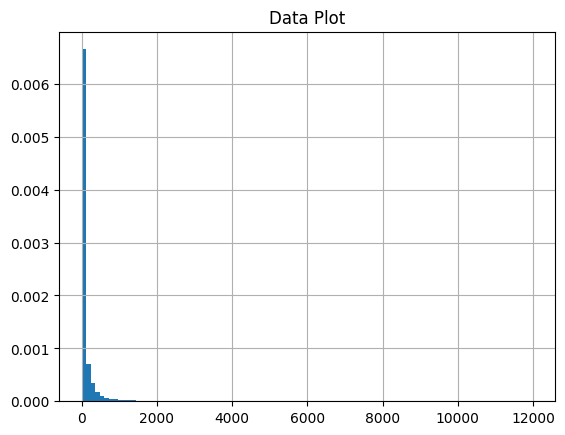

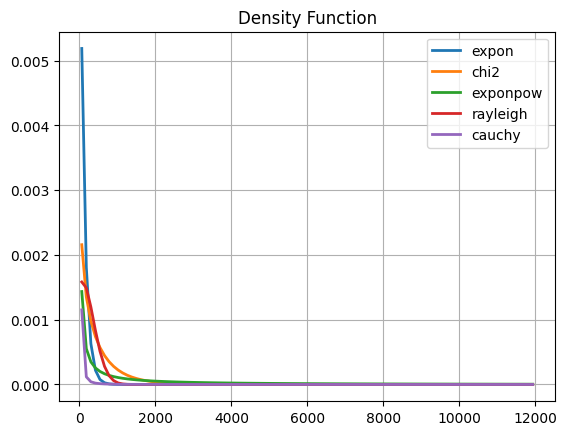

2024-04-02 04:27:19.263 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.637336)
2024-04-02 04:27:19.274 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.139105)
2024-04-02 04:27:19.302 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.892999)
2024-04-02 04:27:19.319 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.56861)


Fitting distributions for new_deaths_per_million


2024-04-02 04:27:19.465 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.220002)
2024-04-02 04:27:20.078 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.28765)
2024-04-02 04:27:20.120 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.386321)
2024-04-02 04:27:20.155 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.880565)
2024-04-02 04:27:20.369 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.454678)
2024-04-02 04:27:20.412 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.905464)


BEST FIT: expon
Parameters: (0.0, 1.1327288562607771)


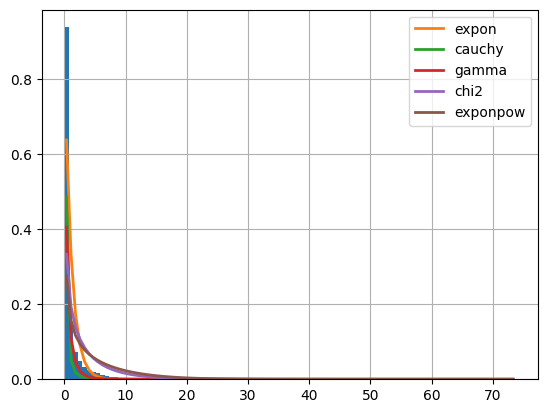

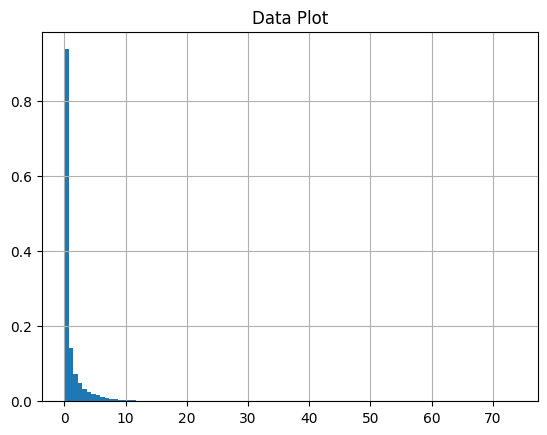

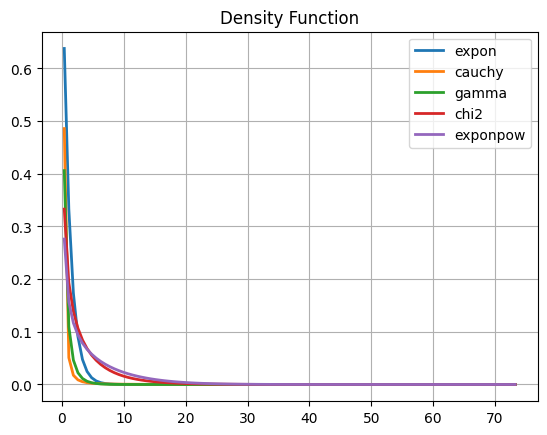

2024-04-02 04:27:20.895 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.016957)
2024-04-02 04:27:20.899 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.023126)
2024-04-02 04:27:20.919 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.019819)
2024-04-02 04:27:20.944 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.022476)


Fitting distributions for people_vaccinated_per_hundred


2024-04-02 04:27:21.074 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.024133)
2024-04-02 04:27:21.628 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.008983)
2024-04-02 04:27:21.712 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.012441)
2024-04-02 04:27:21.721 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.06827)
2024-04-02 04:27:21.961 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.029406)
2024-04-02 04:27:22.032 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.011463)


BEST FIT: gamma
Parameters: (0.6718223352360022, -0.00038398126773062763, 49.641040551525364)


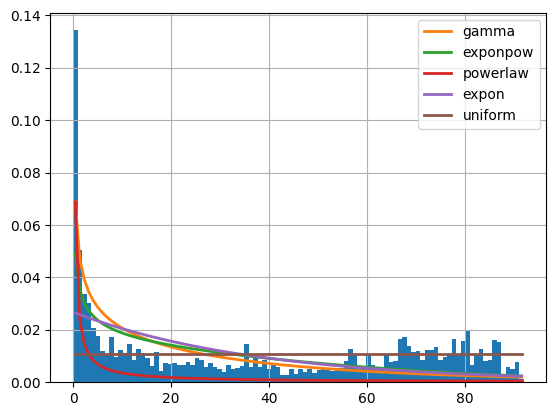

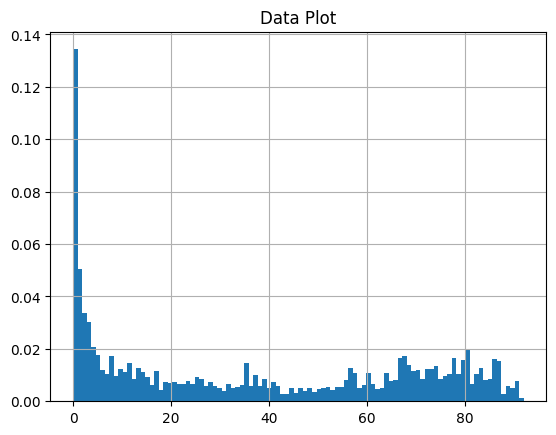

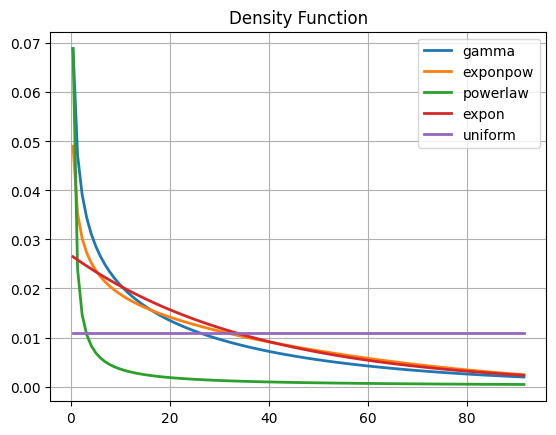

2024-04-02 04:27:22.926 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.03917)
2024-04-02 04:27:22.933 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.02993)
2024-04-02 04:27:22.955 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.036338)
2024-04-02 04:27:22.985 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.038138)


Fitting distributions for people_fully_vaccinated_per_hundred


2024-04-02 04:27:23.170 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.038416)
2024-04-02 04:27:23.902 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.020415)
2024-04-02 04:27:23.973 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.055134)
2024-04-02 04:27:23.985 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.023694)
2024-04-02 04:27:24.261 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.046043)
2024-04-02 04:27:24.313 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.014577)


BEST FIT: exponpow
Parameters: (0.5390615926874021, -1.7930957133534e-28, 64.30671733886524)


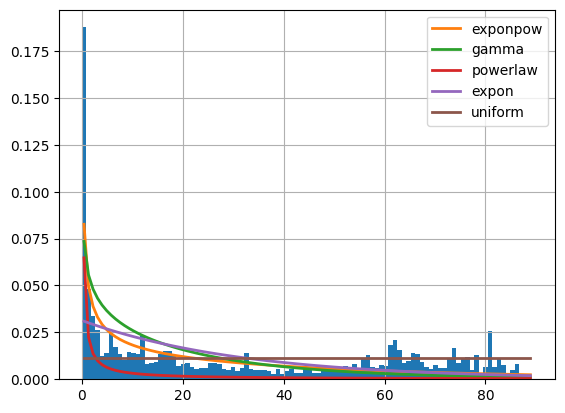

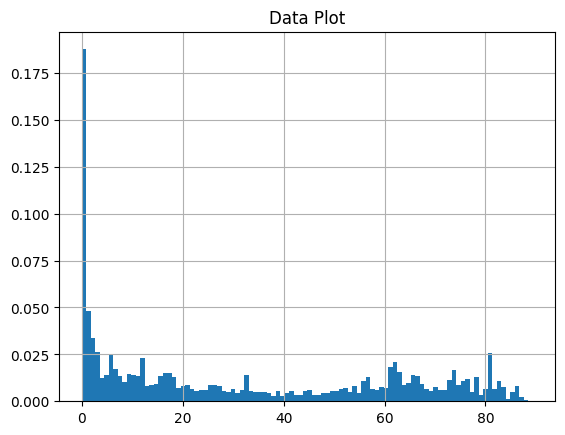

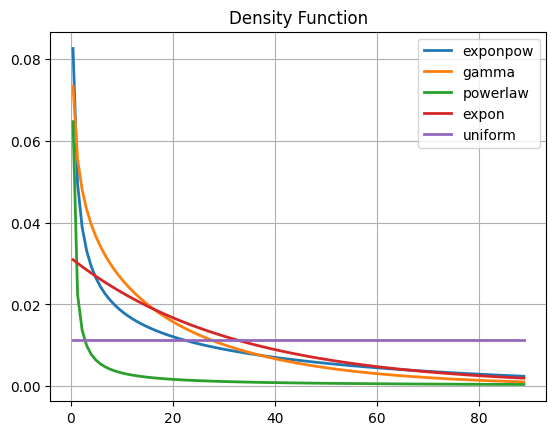

2024-04-02 04:27:26.201 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.004455)
2024-04-02 04:27:26.206 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.009915)
2024-04-02 04:27:26.222 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.006166)
2024-04-02 04:27:26.238 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.005245)


Fitting distributions for stringency_index


2024-04-02 04:27:26.380 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.005501)
2024-04-02 04:27:27.028 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.004533)
2024-04-02 04:27:27.091 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.031499)
2024-04-02 04:27:27.154 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.079619)
2024-04-02 04:27:27.330 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.004493)
2024-04-02 04:27:27.445 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.033828)


BEST FIT: norm
Parameters: (51.46787462957801, 22.440457140904996)


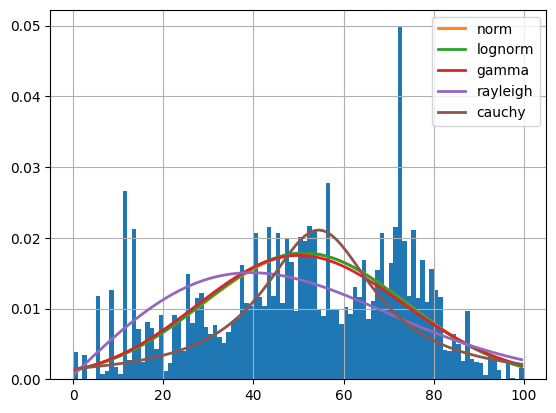

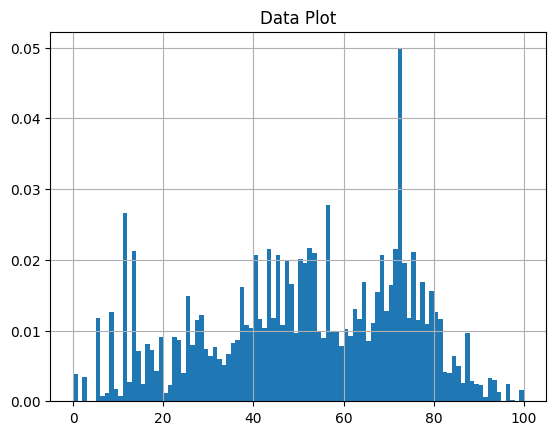

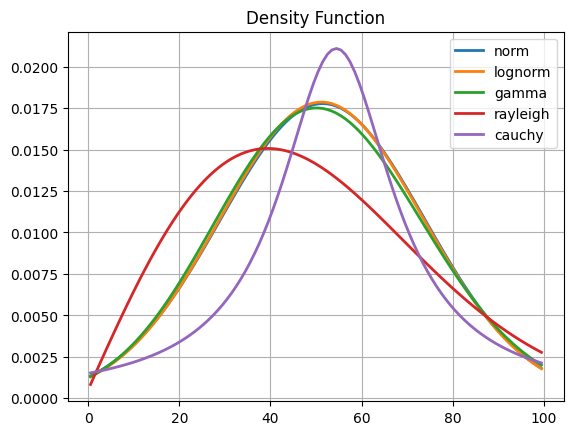

2024-04-02 04:27:27.824 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000243)
2024-04-02 04:27:27.826 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=9.7e-05)
2024-04-02 04:27:27.841 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000364)
2024-04-02 04:27:27.883 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.000211)
2024-04-02 04:27:27.940 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=7.9e-05)


Fitting distributions for population_density


2024-04-02 04:27:28.022 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.000142)
2024-04-02 04:27:28.029 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.000212)
2024-04-02 04:27:28.342 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000112)
2024-04-02 04:27:28.371 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.000112)
2024-04-02 04:27:28.727 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.00014)


BEST FIT: lognorm
Parameters: (1.0332406380372692, -1.389148020361614, 82.27278613922383)


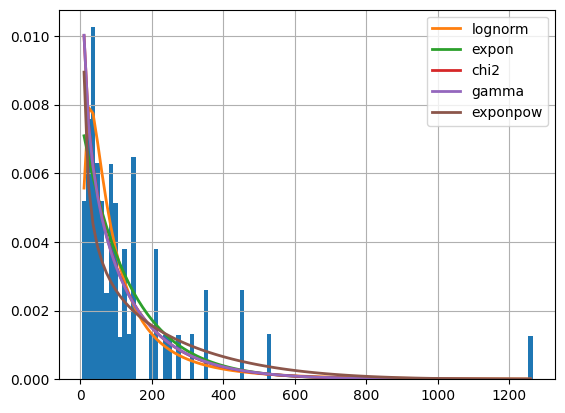

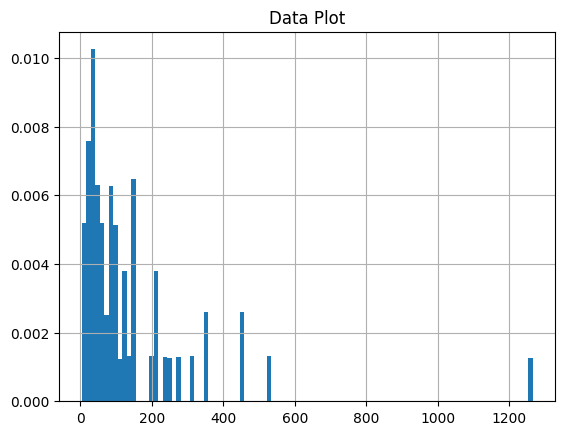

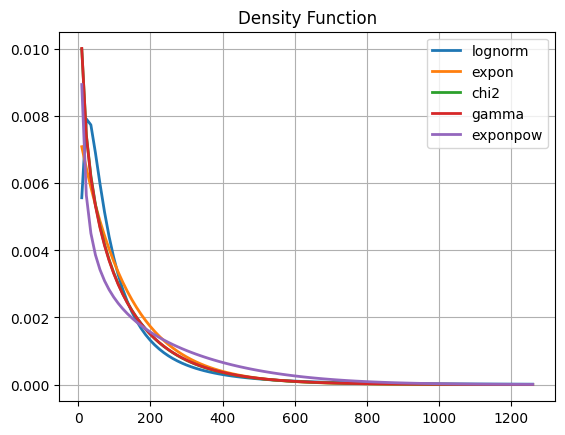

2024-04-02 04:27:29.148 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.312841)
2024-04-02 04:27:29.159 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.329183)
2024-04-02 04:27:29.200 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.309121)
2024-04-02 04:27:29.214 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.314357)


Fitting distributions for median_age


2024-04-02 04:27:29.292 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.318093)
2024-04-02 04:27:29.312 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.312841)
2024-04-02 04:27:29.368 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.325156)
2024-04-02 04:27:29.416 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.312844)
2024-04-02 04:27:29.609 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.313333)
2024-04-02 04:27:30.012 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.565549)


BEST FIT: uniform
Parameters: (16.4, 31.800000000000004)


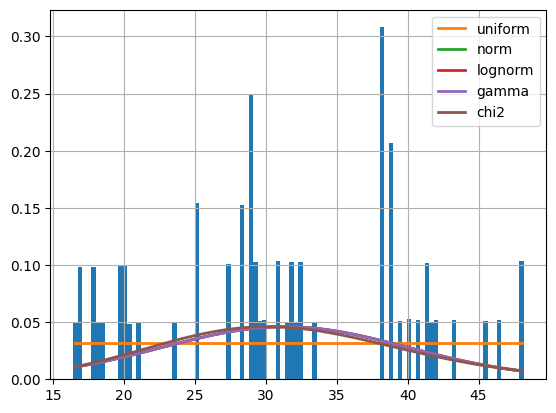

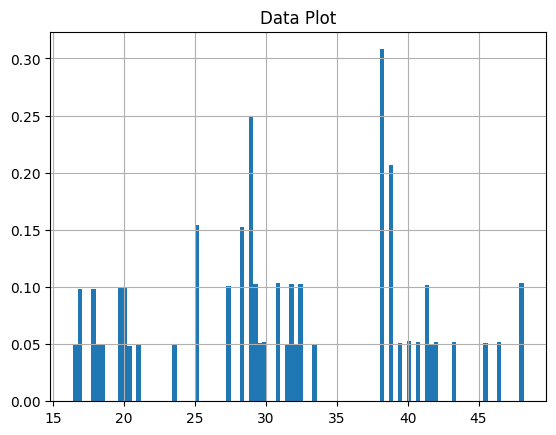

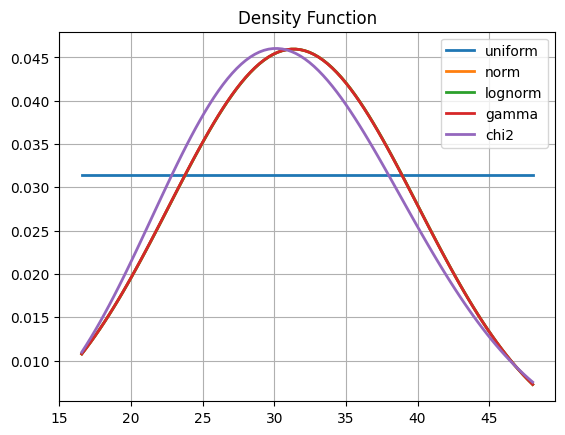

2024-04-02 04:27:30.441 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-04-02 04:27:30.443 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-04-02 04:27:30.456 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)


Fitting distributions for gdp_per_capita


2024-04-02 04:27:30.543 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-04-02 04:27:30.596 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-04-02 04:27:30.692 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.0)
2024-04-02 04:27:30.708 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.0)
2024-04-02 04:27:31.062 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-04-02 04:27:31.073 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.0)
2024-04-02 04:27:31.457 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.0)


BEST FIT: expon
Parameters: (808.133, 18333.117896524484)


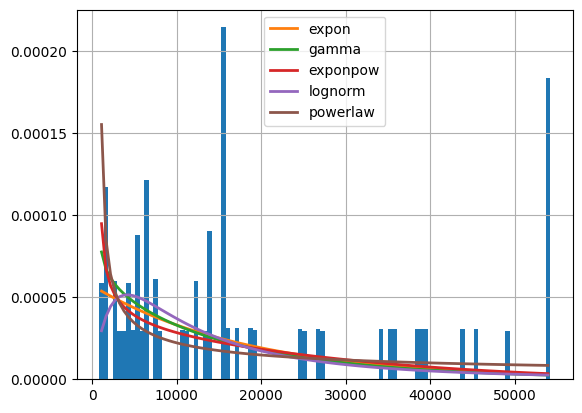

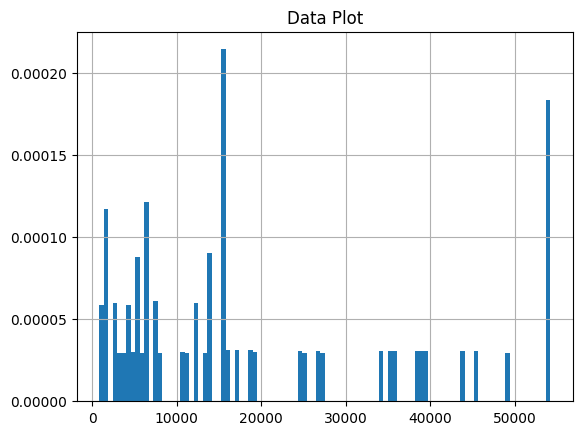

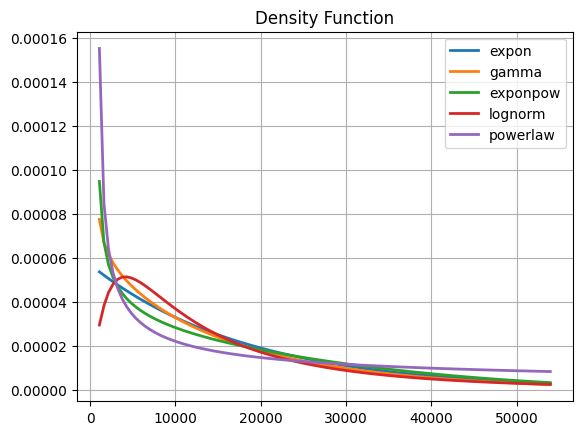

2024-04-02 04:27:31.828 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.149249)
2024-04-02 04:27:31.831 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.229574)
2024-04-02 04:27:31.846 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.247046)
2024-04-02 04:27:31.923 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.222092)


Fitting distributions for extreme_poverty


2024-04-02 04:27:32.048 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.108608)
2024-04-02 04:27:32.057 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.079526)
2024-04-02 04:27:32.108 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.180156)
2024-04-02 04:27:32.459 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.070368)
2024-04-02 04:27:32.477 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.078521)
2024-04-02 04:27:32.844 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.108276)


BEST FIT: gamma
Parameters: (0.3758720880592318, 0.09999999999999999, 23.7352384028328)


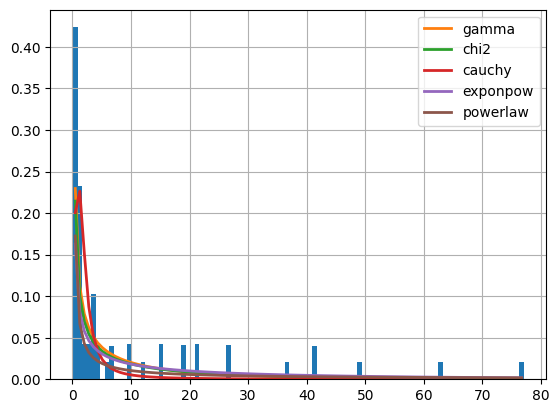

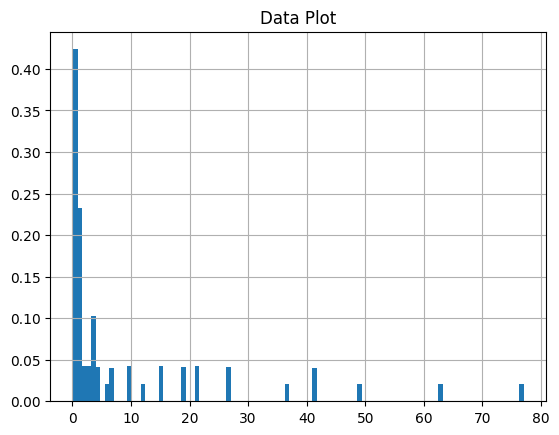

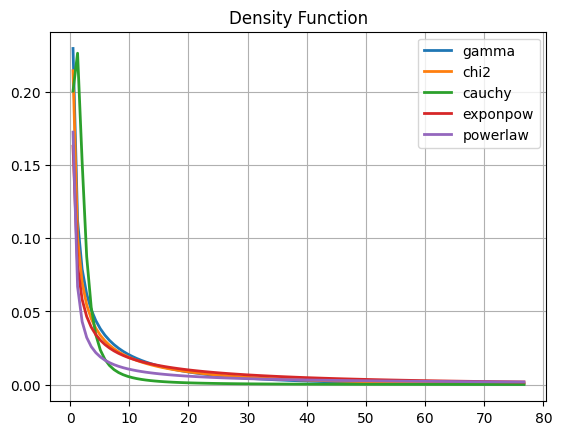

2024-04-02 04:27:33.852 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.000768)
2024-04-02 04:27:33.854 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000761)
2024-04-02 04:27:33.873 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.000902)
2024-04-02 04:27:33.902 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.000735)
2024-04-02 04:27:33.950 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.000729)


Fitting distributions for cardiovasc_death_rate


2024-04-02 04:27:34.034 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.000751)
2024-04-02 04:27:34.036 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.000892)
2024-04-02 04:27:34.109 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000732)
2024-04-02 04:27:34.215 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.000732)
2024-04-02 04:27:34.744 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.000734)


BEST FIT: lognorm
Parameters: (0.5359570292003587, 12.071304026070807, 206.94446106971424)


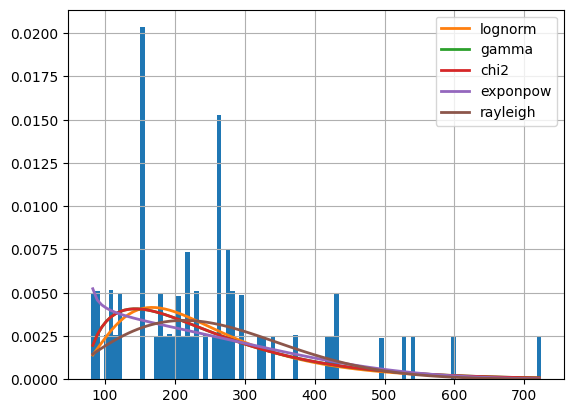

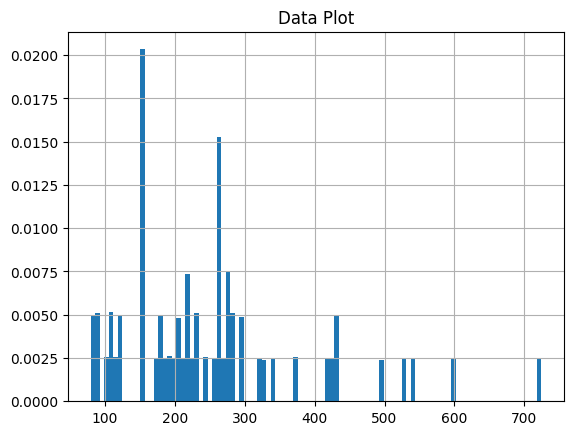

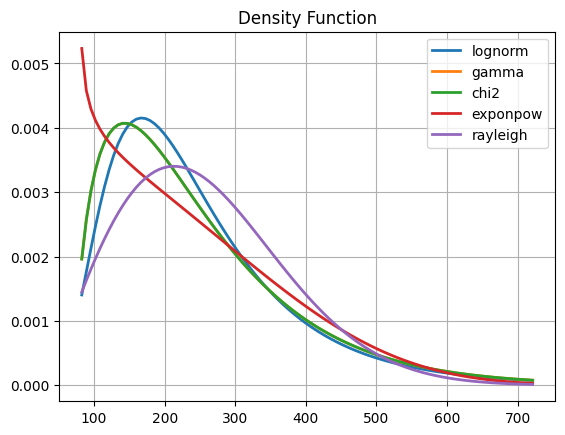

2024-04-02 04:27:35.236 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=2.26694)
2024-04-02 04:27:35.240 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1.831957)
2024-04-02 04:27:35.257 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=2.770695)
2024-04-02 04:27:35.270 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.119049)
2024-04-02 04:27:35.321 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.882378)
2024-04-02 04:27:35.345 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=2.058544)
2024-04-02 04:27:35.371 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=2.562134)


Fitting distributions for hospital_beds_per_thousand


2024-04-02 04:27:35.707 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2.992683)
2024-04-02 04:27:35.733 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=2.735067)
2024-04-02 04:27:36.023 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=2.469963)


BEST FIT: expon
Parameters: (0.3, 2.520989684973516)


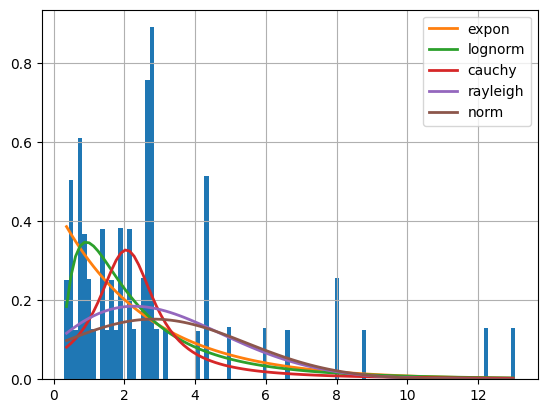

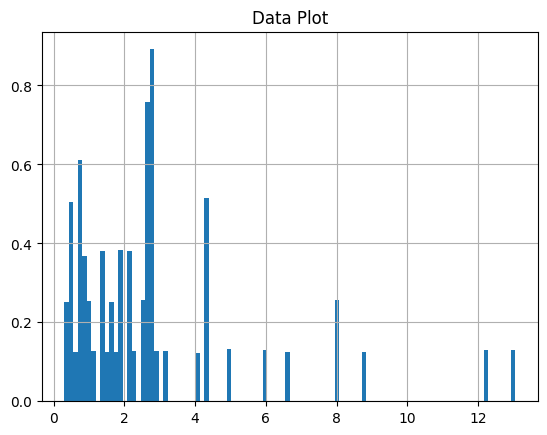

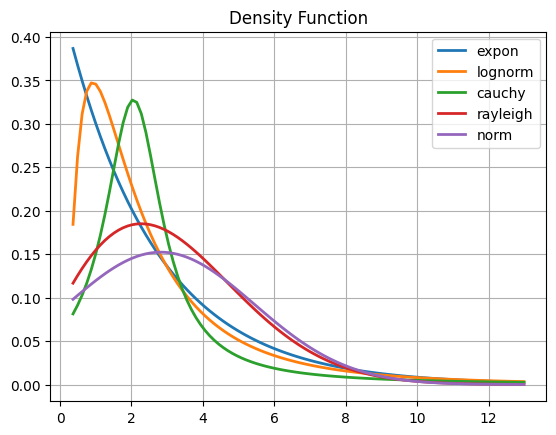

2024-04-02 04:27:36.425 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.472806)
2024-04-02 04:27:36.426 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.388665)
2024-04-02 04:27:36.454 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.415758)
2024-04-02 04:27:36.472 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.409621)
2024-04-02 04:27:36.493 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.393925)
2024-04-02 04:27:36.521 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.388665)


Fitting distributions for life_expectancy


2024-04-02 04:27:36.563 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.390628)
2024-04-02 04:27:36.899 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.389942)
2024-04-02 04:27:36.917 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.391004)
2024-04-02 04:27:37.327 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.724957)


BEST FIT: norm
Parameters: (73.43862961930427, 6.6083466081012245)


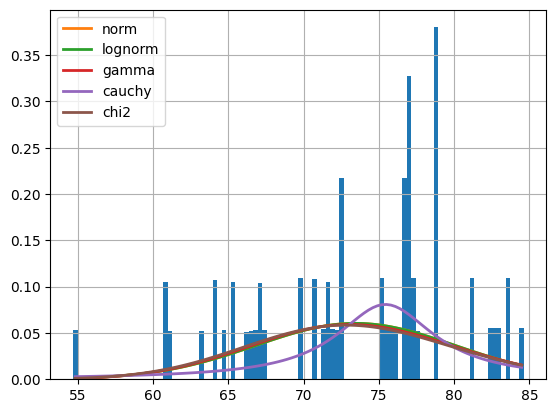

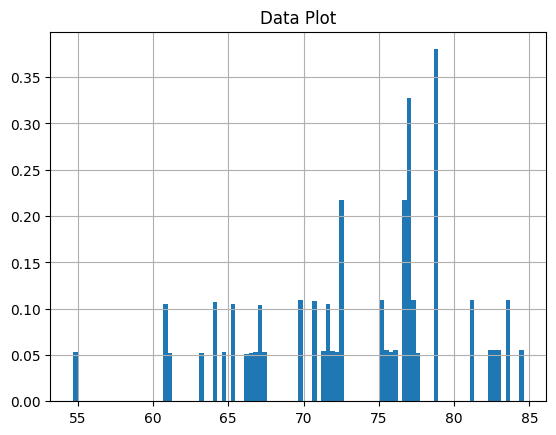

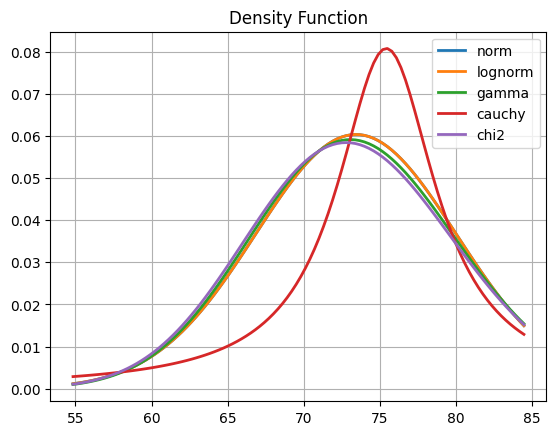

2024-04-02 04:27:37.704 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1375.506062)
2024-04-02 04:27:37.705 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=1253.412616)
2024-04-02 04:27:37.723 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1217.244343)
2024-04-02 04:27:37.743 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1271.340293)
2024-04-02 04:27:37.793 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=1284.41622)
2024-04-02 04:27:37.835 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1253.413657)
2024-04-02 04:27:37.850 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=1262.902943)


Fitting distributions for human_development_index


2024-04-02 04:27:38.051 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=1243.378965)
2024-04-02 04:27:38.085 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=1675.515879)
2024-04-02 04:27:38.134 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1255.734313)


BEST FIT: uniform
Parameters: (0.456, 0.49099999999999994)


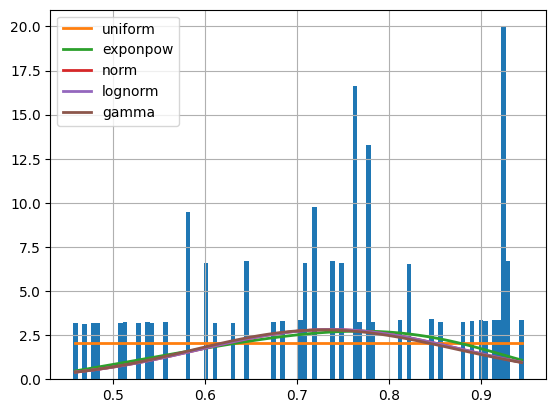

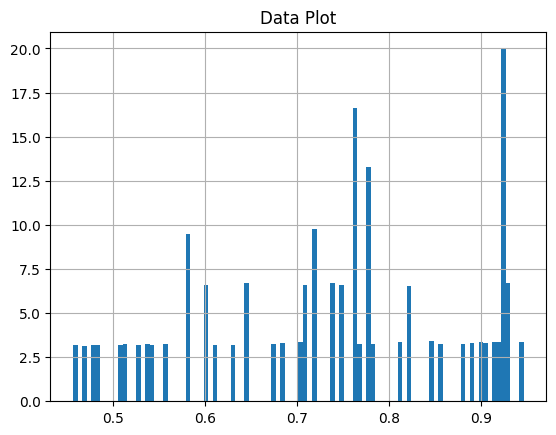

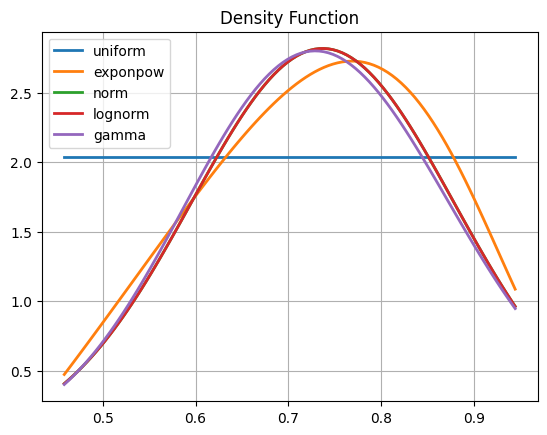

2024-04-02 04:27:38.490 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-04-02 04:27:38.493 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-04-02 04:27:38.506 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.0)


Fitting distributions for population


2024-04-02 04:27:38.648 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-04-02 04:27:38.650 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.0)
2024-04-02 04:27:38.758 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.0)
2024-04-02 04:27:38.794 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.0)
2024-04-02 04:27:39.068 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-04-02 04:27:39.089 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.0)
2024-04-02 04:27:39.456 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.0)


BEST FIT: cauchy
Parameters: (55300684.36904381, 33345874.09429311)


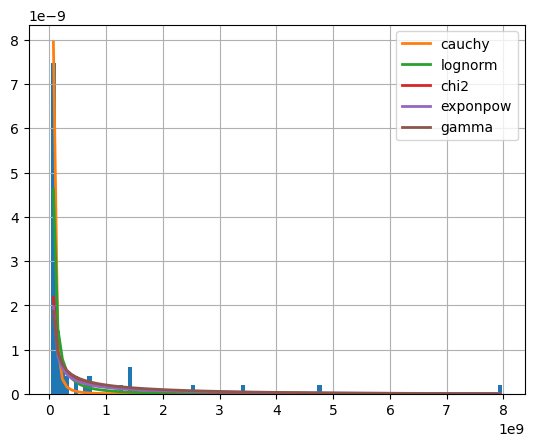

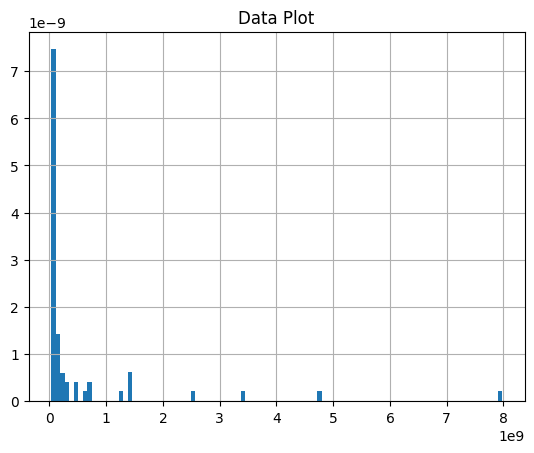

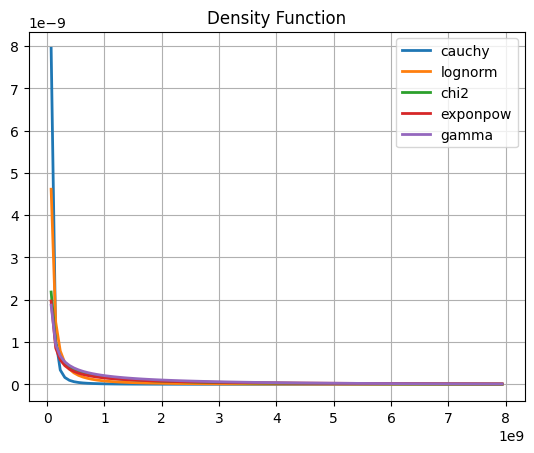

In [32]:
import scipy.stats as stats
# 3. For each numeric field separately, using the imputed data:
#        a) identify best distributions using the Fitter library 
#           (https://pypi.org/project/fitter/) 
#           Only consider the subset in common_distributions
#        b) print the summary for each fit using the built in fitter summary() function
#        c) plot the data using the Fitter.hist() function
#        d) plot the density function using the Fitter.plot_pdf() function

common_distributions = get_common_distributions()
bestFitList = []
#FOR THIS PROBLEM I ASSUMED THAT WE ARE DOING THE FIT ON THE ORIGININAL NUMERIC Dataframe AND NOT THE PCA Dataframe
for i in imputedNumericDF.columns:
    print("Fitting distributions for " + str(i))
    
    # Starting the Fitter limiting it to common distributions
    f = Fitter (imputedNumericDF[i], distributions=common_distributions)
    
    f.fit()

    bestFit = f.get_best(method='sumsquare_error')
    
    # Getting the name of the best fit distribution
    bestFitName = list(bestFit.keys())[0]
    print("BEST FIT:", bestFitName)
    
    # Fitting the distribution to data again to extract its parameters to be used in the next section
    bestFitDist = getattr(stats, bestFitName)
    bestFitDist.fit(imputedNumericDF[i])
    
    # Getting the parameters
    bestFitParams = bestFitDist.fit(imputedNumericDF[i])
    
    print("Parameters:", bestFitParams)
    
    bestFitList.append([i, bestFitName, bestFitParams])


    f.summary()

    plt.figure()
    plt.title("Data Plot")
    f.hist()
    plt.show()

    plt.figure()
    plt.title("Density Function")
    f.plot_pdf()
    plt.show()
  
    
    

In [33]:
from scipy.stats import entropy
# 4. For each numeric field separately, using the imputed data:
#        a) Using the best distribution from the previous cell, _and all of its parameters_,
#           print the results of the associated entropy() method in scipy.stats
#           e.g., if the best distribution found is chi2, call
#                 scipy.stats.chi2.entropy( mydf, loc=myloc, scale=myscale ) for 
#                 computed values of mydf, myloc, and myscale
#        b) bin the data for that field once into 100 equal-width bins and
#           once into 100 equal-frequency bins. Store the proportional frequency of
#           each bin, relative to the total number of samples, in p_equalWidth and 
#           p_equalFreq, below
#        c) compute and print the Shannon entropy on each of p_equalWidth and p_equalFreq using
#           https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html


#PART A:
print("FOR PART A calculating the entropies using the best fit distribution from the last section:")
for colName, bestFitName, bestFitParam in bestFitList:
    print("Entropy for", colName)
    
    # Get the best fit distribution (it is in the form scipy.stats.DISTRIBUTION_NAME)
    bestFitDist = getattr(stats, bestFitName)
        
    # Entropy: 
    if len(bestFitParam) == 2:
        # If bestFitParam has 2 elements
        mydf, myscale = bestFitParam
        entropyA = bestFitDist.entropy(mydf, scale=myscale)

    elif len(bestFitParam) == 3:
        # If bestFitParam has 3 elements
        mydf, myloc, myscale = bestFitParam
        entropyA = bestFitDist.entropy(mydf, loc=myloc, scale=myscale)
        
    print("Entropy for " + str(colName) + " using " + str(bestFitName) + " : " + str(entropyA))
    




def manual_equal_width(data, noOfBins):
    minVal, maxVal = np.min(data), np.max(data)
    binWidth = (maxVal - minVal) / noOfBins
    bins = np.arange(minVal, maxVal + binWidth, binWidth)
    binCount = np.zeros(noOfBins)
    
    for d in data:
        index = min(int((d - minVal) / binWidth), noOfBins - 1)
        binCount[index] += 1
    
    probEqualWidth = binCount / len(data)
    return probEqualWidth


def manual_equal_frequency(data, noOfBins):
    srtData = np.sort(data)
    binSize = len(data) // noOfBins
    probEqualFreq = np.zeros(noOfBins)
    
    for i in range(noOfBins):
        firstIndex = i * binSize
        lastIndex = 0
        if i < noOfBins - 1:
            lastIndex = firstIndex + binSize
        else:
            lastIndex = len(data)
        probEqualFreq[i] = (lastIndex - firstIndex) / len(data)
    
    return probEqualFreq

# Function to compute Shannon entropy from probabilities given to it
def compute_shannon_entropy(prob):
    someSmallVal = 0.000000000000000000000001
    nonZeroProb = prob + someSmallVal  # Ensure no zero probabilities are given that would cause problems with the log
    return -np.sum(nonZeroProb * np.log(nonZeroProb))


entResults = []

for column in numeric_fields:
    colData2 = imputedNumericDF[column].dropna().values  # Convert to numpy array and drop NaN

    probEqualWidth = manual_equal_width(colData2, 100)
    probEqualFreq = manual_equal_frequency(colData2, 100)

    entropyEqualWidth = compute_shannon_entropy(probEqualWidth)
    entropyEqualFreq = compute_shannon_entropy(probEqualFreq)

    entResults.append({
        'Col': column,
        'Entropy Eq Width': entropyEqualWidth,
        'Entropy Eq Freq': entropyEqualFreq
    })

# Convert results to DataFrame for better visualization
entResultsDF = pd.DataFrame(entResults)
print(entResultsDF)


FOR PART A calculating the entropies using the best fit distribution from the last section:
Entropy for new_cases_per_million
Entropy for new_cases_per_million using expon : 5.734138340108517
Entropy for new_deaths_per_million
Entropy for new_deaths_per_million using expon : 1.124629638542989
Entropy for people_vaccinated_per_hundred
Entropy for people_vaccinated_per_hundred using gamma : 4.445571637655128
Entropy for people_fully_vaccinated_per_hundred
Entropy for people_fully_vaccinated_per_hundred using exponpow : 4.417974305847373
Entropy for stringency_index
Entropy for stringency_index using norm : 4.529803985349751
Entropy for population_density
Entropy for population_density using lognorm : 5.861679033284372
Entropy for median_age
Entropy for median_age using uniform : 3.4594662897861315
Entropy for gdp_per_capita
Entropy for gdp_per_capita using expon : 10.81646442437879
Entropy for extreme_poverty
Entropy for extreme_poverty using gamma : 2.6890937448565677
Entropy for cardio

**TODO**: First of all setting bins to have equal frequencies gives the same entropy for all fields because the probabilities are calculated based on the frequency of data in each bin and bins have the same amount of data, therefore leading to the same entropy. This is not an informative way to calculate the entropy, making it the least informative way to calculate the entropy. The most informative numeric fields are the ones with the highest entropy. These fields give us the most information: population, gdp_per_capita, cardiovasc_death_rate, population_density, new_cases_per_million. Least Informative were: human_development_index, new_deaths_per_million, hospital_beds_per_thousand, extreme_poverty (According to the best fit distribution calculation).

FOR NEW CASES PER MILLION:


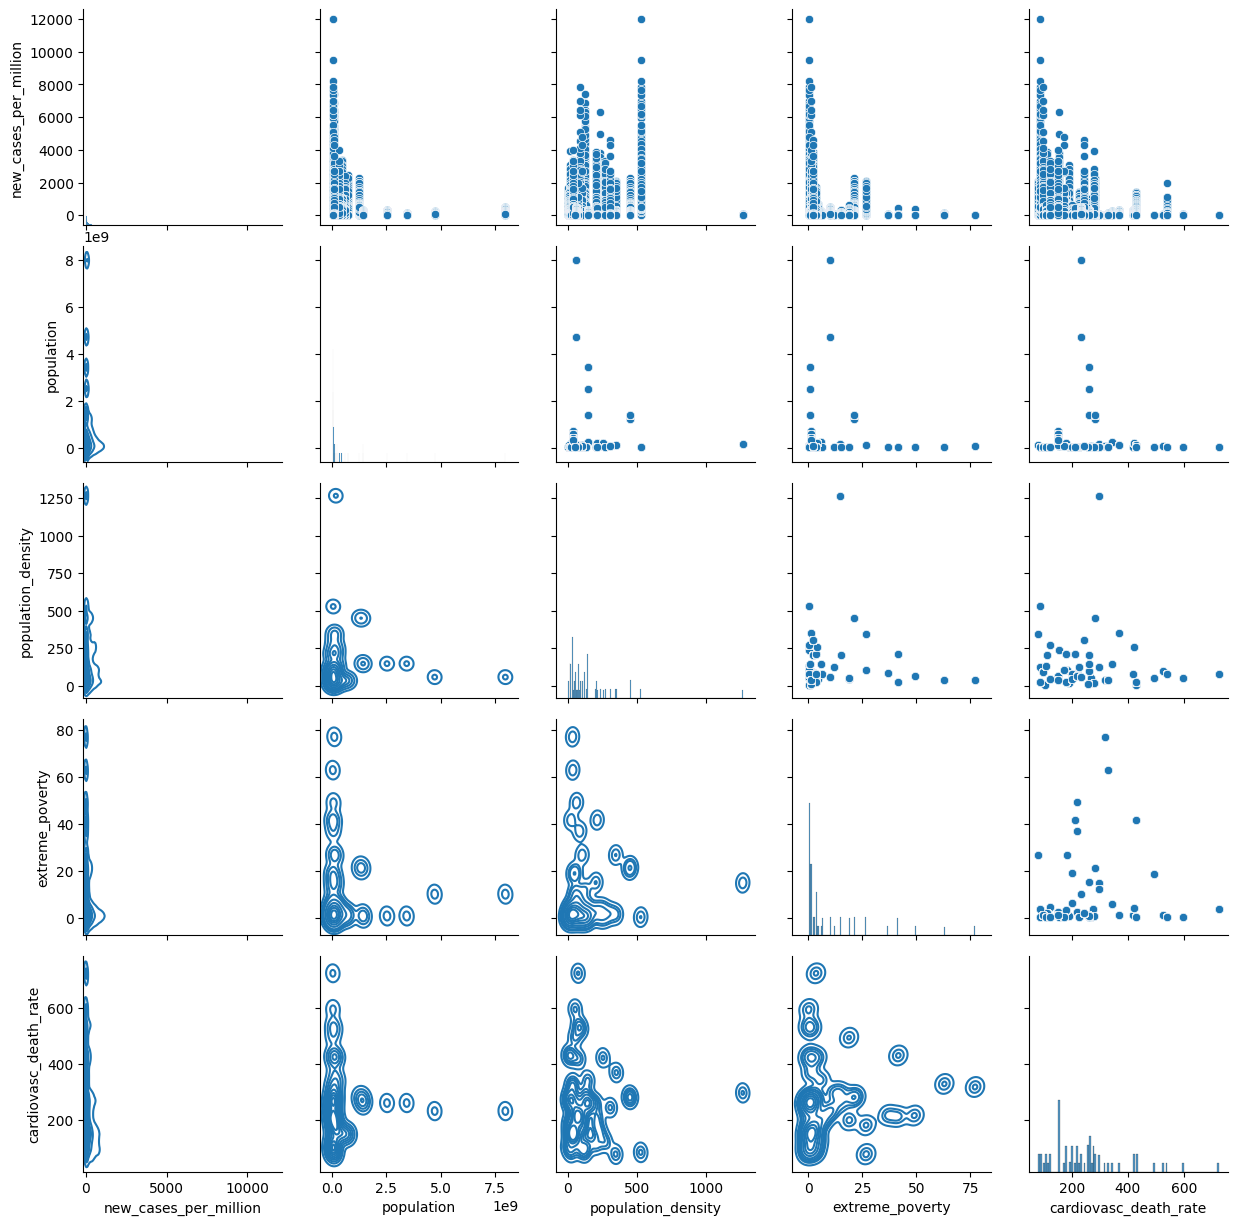

FOR NEW DEATHS PER MILLION:


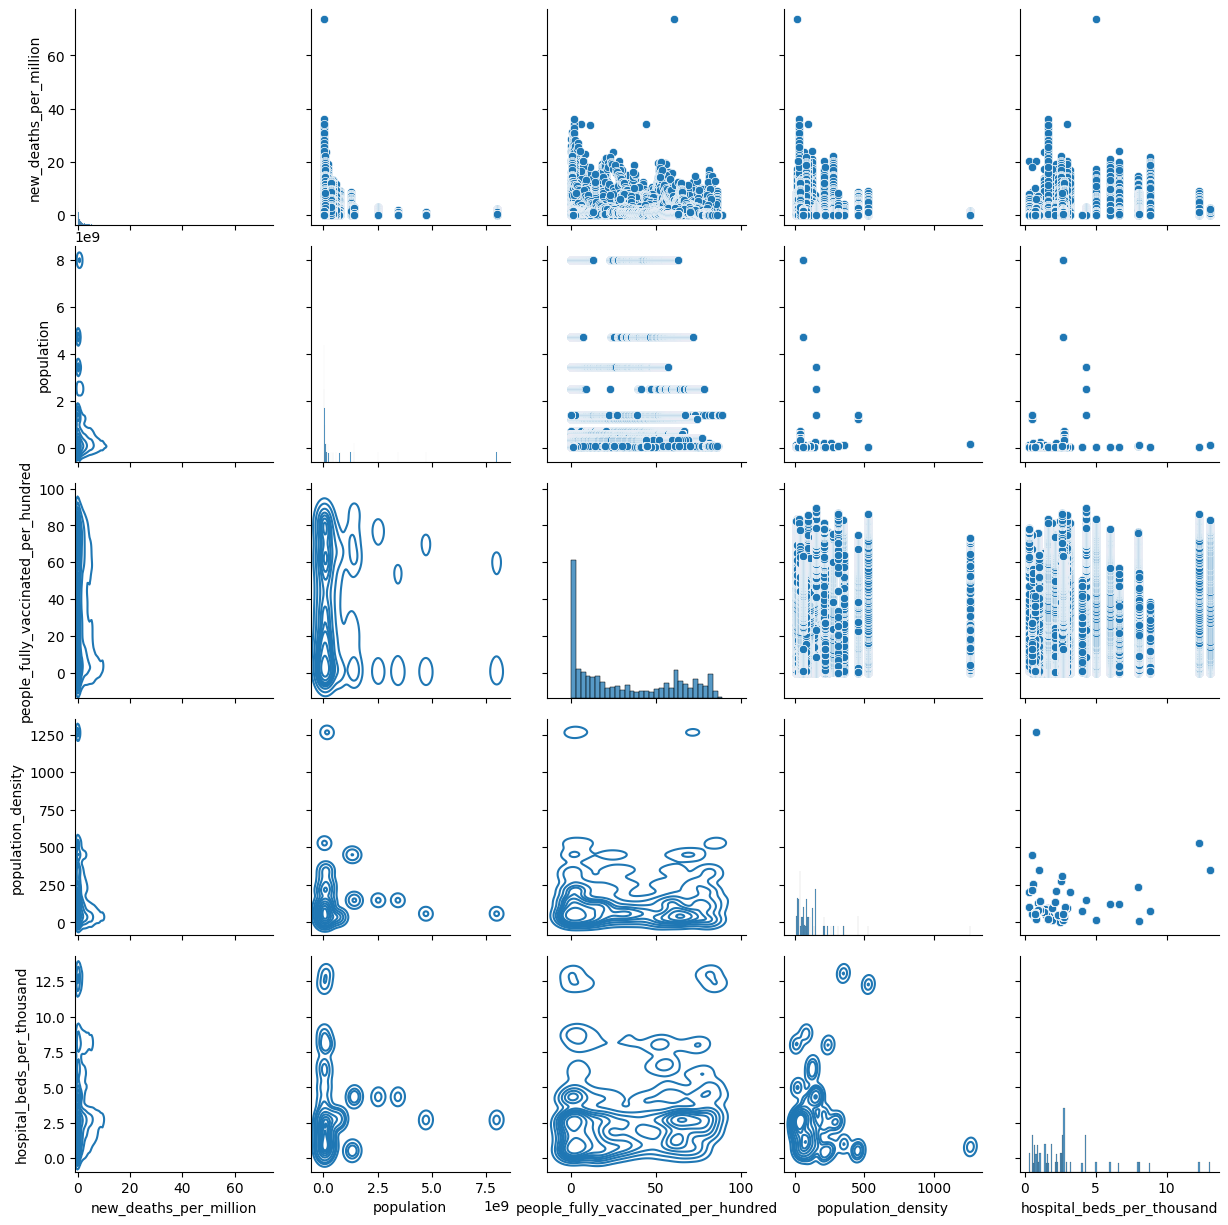

In [34]:
# 5. Identify variables that relate to important COVID outcomes
#    For each of 'new_cases_per_million' and 'new_deaths_per_million', compute Pearson
#    correlation (using https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
#    with that field and all other numeric fields
#
#        For the 4 features most correlated with the outcome of interest, plot a 5x5 
#        SeaBorn PairGrid (https://seaborn.pydata.org/generated/seaborn.PairGrid.html) with
#        scatter in the upper matrix, histograms on the diagonal, and kde plots on the 
#        lower matrix, as in:
#
#               g = sns.PairGrid(penguins, diag_sharey=False)
#               g.map_upper(sns.scatterplot)
#               g.map_lower(sns.kdeplot)
#               g.map_diag(sns.histplot)
#
#    In the Markdown cell below, list the features that are most correlated with 
#    'new_cases_per_million' and 'new_deaths_per_million'. Are these the same that 
#    were 'informative' in task 4 of Section 2? Why or why not?
#
# TODO: your code goes here


# Compute Pearson correlation
corrMatrix = imputedNumericDF.corr()

# For 'new_cases_per_million'
newCasesPMCorr = corrMatrix ["new_cases_per_million"].sort_values(key=abs)
topFeaturesOfNewCasesPM = newCasesPMCorr.index[1:5].tolist()
#we get 1-5 because 0 would be itself

# For 'new_deaths_per_million'
newDeathPMCorr = corrMatrix['new_deaths_per_million'].sort_values(key=abs)
topFeaturesOfNewDeathsPM = newDeathPMCorr.index[1:5].tolist()

# Visualization for 'new_cases_per_million'
print("FOR NEW CASES PER MILLION:")
g_cases = sns.PairGrid(imputedCovidData[['new_cases_per_million'] + topFeaturesOfNewCasesPM])
g_cases.map_upper(sns.scatterplot)
g_cases.map_lower(sns.kdeplot)
g_cases.map_diag(sns.histplot)

plt.show()

# Visualization for 'new_deaths_per_million'
print("FOR NEW DEATHS PER MILLION:")
g_deaths = sns.PairGrid(imputedCovidData[['new_deaths_per_million'] + topFeaturesOfNewDeathsPM])
g_deaths.map_upper(sns.scatterplot)
g_deaths.map_lower(sns.kdeplot)
g_deaths.map_diag(sns.histplot)

plt.show()

The most relevant ones to new cases are population, population density, extreme poverty, cardiovascular death rate.
The most relevant ones to new deaths are population, people fully vaccinated per hundred, population density and hospital beds per thousand. They are the same because more entropy means more informative and more informative means more relevant.